# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 


# Import datasets

In [2]:
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged.pkl'))

In [5]:
#Change settings to show all variables/columns
pd.set_option('display.max_columns', None)

In [6]:
#View top 5 rows of dataframe
cust_ords_prods.head()

,customer_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag,Check
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


## 3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the "order_hour_of_day" column. Describe what the histogram demonstrates. 

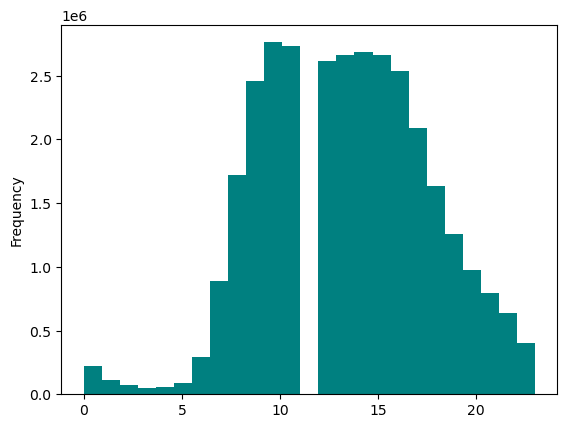

In [30]:
#Histogram of "order_hour_of_day" variable
#ords_prods_merge['prices'].plot.hist(bins=25)
hist = cust_ords_prods['order_hour_of_day'].plot.hist(bins=25, color='teal')

In [31]:
#Export histogram
hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [8]:
#View frequency in a table
cust_ords_prods['order_hour_of_day'].value_counts()

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [9]:
#View descriptive statistics for the variable
cust_ords_prods['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

### The 12 o'clock hour seems to be missing in the histogram. BUT there are 24 bars (which equates to the 24 time slots available in a single day). The histogram shows that the 10 and 11 o'clock hours are the busiest times, followed by the afternoon times between 12 and 4 o'clock. 3 in the morning is the least busy time. 

## 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the "loyalty_flag" column. 

Text(0.5, 1.0, 'Distribution of Orders based on Customer Loyalty')

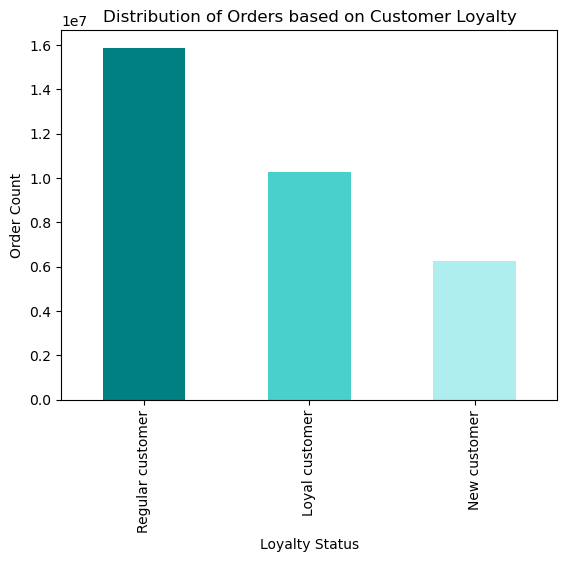

In [27]:
#Bar chart for "loyalty_flag" column 
#bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])
bar = cust_ords_prods['loyalty_flag'].value_counts().plot.bar(color=['teal', 'mediumturquoise','paleturquoise'])
plt.xlabel("Loyalty Status")
plt.ylabel("Order Count")
plt.title("Distribution of Orders based on Customer Loyalty")

### Regular customers have the most orders, followed by loyal customers. New customers have the least number of orders. 

In [28]:
#Export bar chart
#bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))
bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_loyalty_status.png'))

## 5 Check whether there is a difference in expenditure (the "prices" column) depending on the hour of the day. Hint: To check this, you need to use an accurate sample for your line chart.

In [32]:
#70/30 percent split of the data to create a random sample 
np.random.seed(4) #reproducible random selection 
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [33]:
#Check the dev selection
dev

array([False,  True, False, ...,  True,  True,  True])

In [34]:
#Store the 70/30 percents
big70 = cust_ords_prods[dev] #true values 
small30 = cust_ords_prods[~dev] #small values

In [35]:
#Check the length of dataframe cust_ords_prods
cust_ords_prods.shape

(32404859, 34)

In [36]:
#Check the lengths of 70/30 percents subsets
len(big70) + len(small30)

32404859

In [37]:
#Show only the 30 percent group of random numbers 
df = small30[['order_hour_of_day','prices']]

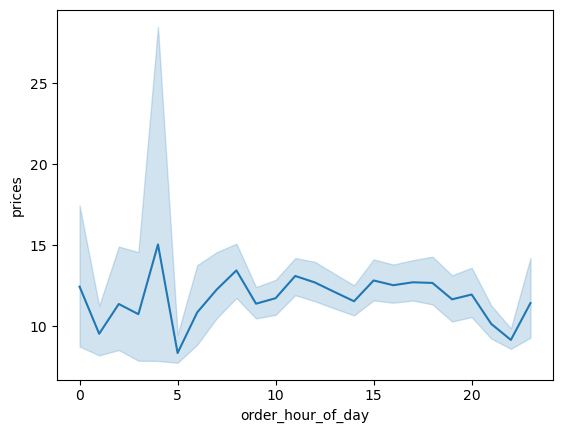

In [38]:
#Line chart 
line = sns.lineplot(data = df, x='order_hour_of_day', y='prices')

In [39]:
#Export line chart
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_order_hour_prices.png'))

## 6 You need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. Describe what the line chart shows. 

In [40]:
cust_ords_prods.head()

,customer_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag,Check
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [41]:
#Create subset dataframe df_2 for 30% for variables: age and n_dependents
df_2 = small30[['Age', 'n_dependents']]

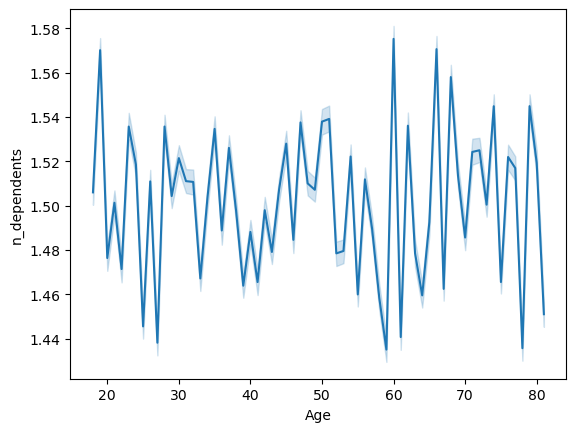

In [45]:
#Line chart 
line_2 = sns.lineplot(data = df_2, x='Age', y='n_dependents')

### According to the random sample of data from the Age column and the n_dependents column, there is a random relationship between the two variables. Meaning, there is no positive or negative correlation/relationship between the two variables, age and number of dependents. 

In [49]:
#Export line chart
line_2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_2_age_dep.png'))

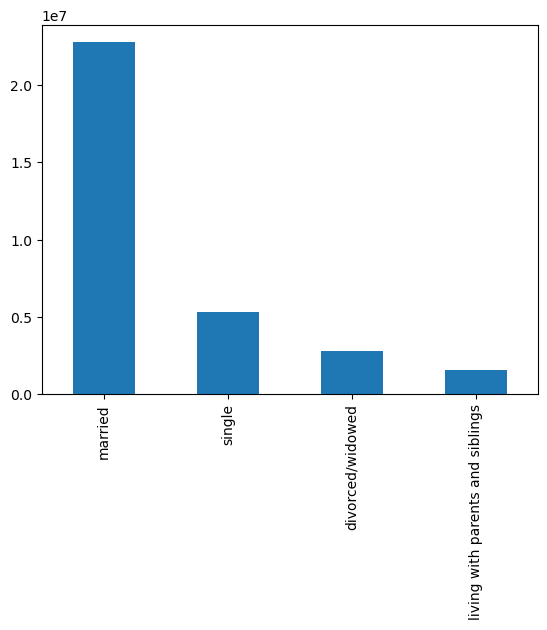

In [48]:
#Bar chart for fam_status and income
bar_2 = cust_ords_prods['fam_status'].value_counts().plot.bar()
    #color=['teal', 'mediumturquoise','paleturquoise'])
#plt.xlabel("Loyalty Status")
#plt.ylabel("Order Count")
#plt.title("Distribution of Orders based on Customer Loyalty")

### Family status of "married" orders more frequently than any other family status. 

## 7 You'll also need to explore whether there's a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. Describe what the scatterplot shows 

In [50]:
#Create subset dataframe df_2 for 30% for variables: age and income
df_3 = small30[['Age', 'income']]

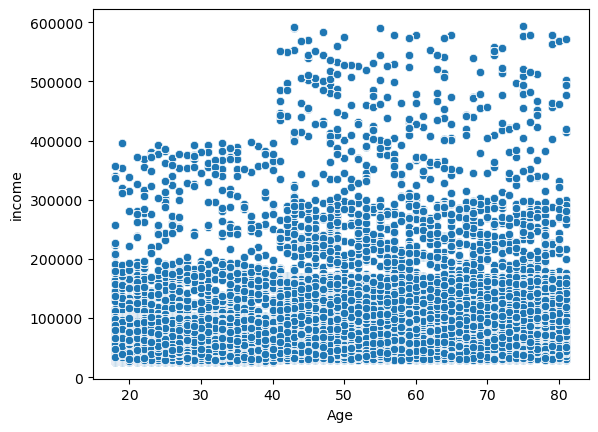

In [72]:
#Scatterplot 
scatter = sns.scatterplot(data = df_3, x='Age', y='income')

In [73]:
#Export scatter plot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

### There is a jump in income around age 40; those adults over 40 tend to have more spending power than adults under 40. Majority of the spending power / income seems to be 200000 dollars and below (there is a greater density of Instacart users in this area). 

In [69]:
#View descriptive statistics for income and age variables 
cust_ords_prods[['income','Age']].describe()

,income,Age
count,3.240486e+07,3.240486e+07
mean,9.943773e+04,4.946527e+01
std,4.305727e+04,1.848558e+01
min,2.590300e+04,1.800000e+01
25%,6.700400e+04,3.300000e+01
50%,9.661800e+04,4.900000e+01
75%,1.279120e+05,6.500000e+01
max,5.939010e+05,8.100000e+01
